In [44]:
import pandas as pd 
import pyarrow.parquet as pq
from pydrill.client import PyDrill
import missingno as msno 

# Loading the data into Pandas 

Pandas is useful for me to review the data initially, i.e. 

- Eyeball the nature of the data 
- Review the heading 
- Review data types 
- Do the joining of the files 
- Describe the statistics about the set



In [6]:
weather_20160201 = pd.read_csv("weather.20160201.csv")
weather_20160301 = pd.read_csv("weather.20160301.csv")

# Quick review of data

In [36]:
weather_20160201.head()

ForecastSiteCode  ObservationTime      ObservationDate  WindDirection  \
0              3002                0  2016-02-01T00:00:00             12   
1              3005                0  2016-02-01T00:00:00             10   
2              3008                0  2016-02-01T00:00:00              8   
3              3017                0  2016-02-01T00:00:00              6   
4              3023                0  2016-02-01T00:00:00             10   

   WindSpeed  WindGust  Visibility  ScreenTemperature  Pressure  \
0          8       NaN     30000.0                2.1     997.0   
1          2       NaN     35000.0                0.1     997.0   
2          6       NaN     50000.0                2.8     997.0   
3          8       NaN     40000.0                1.6     996.0   
4         30      37.0      2600.0                9.8     991.0   

   SignificantWeatherCode                    SiteName  Latitude  Longitude  \
0                       8           BALTASOUND (3002)    60.749     -0.854   
1                       7  LERWICK (S. SCREEN) (3005)    60.139     -1.183   
2                     -99            FAIR ISLE (3008)    59.530     -1.630   
3                       8             KIRKWALL (3017)    58.954     -2.900   
4                      11     SOUTH UIST RANGE (3023)    57.358     -7.397   

                   Region   Country  
0       Orkney & Shetland  SCOTLAND  
1       Orkney & Shetland  SCOTLAND  
2       Orkney & Shetland       NaN  
3       Orkney & Shetland  SCOTLAND  
4  Highland & Eilean Siar  SCOTLAND

In [38]:
weather_20160301.head()

ForecastSiteCode  ObservationTime      ObservationDate  WindDirection  \
0              3002                0  2016-03-01T00:00:00              8   
1              3005                0  2016-03-01T00:00:00              8   
2              3008                0  2016-03-01T00:00:00              7   
3              3017                0  2016-03-01T00:00:00              7   
4              3023                0  2016-03-01T00:00:00             10   

   WindSpeed  WindGust  Visibility  ScreenTemperature  Pressure  \
0         23      30.0     16000.0              -99.0       NaN   
1         26      34.0      5000.0                4.9    1004.0   
2         30      40.0      5000.0                5.1    1003.0   
3         21      29.0      5000.0                5.1    1001.0   
4         25      34.0      2400.0                8.6     994.0   

   SignificantWeatherCode                    SiteName  Latitude  Longitude  \
0                       8           BALTASOUND (3002)    60.749     -0.854   
1                      12  LERWICK (S. SCREEN) (3005)    60.139     -1.183   
2                      11            FAIR ISLE (3008)    59.530     -1.630   
3                      15             KIRKWALL (3017)    58.954     -2.900   
4                      12     SOUTH UIST RANGE (3023)    57.358     -7.397   

                   Region   Country  
0       Orkney & Shetland  SCOTLAND  
1       Orkney & Shetland  SCOTLAND  
2       Orkney & Shetland       NaN  
3       Orkney & Shetland  SCOTLAND  
4  Highland & Eilean Siar  SCOTLAND

# Checking if both have the same columns 

Both have the same column names.

In [11]:
list(set(weather_20160201.columns).difference(set(weather_20160301.columns)))


[]

# Checking the file types between both files 

In [39]:
display(weather_20160201.info())
display(weather_20160301.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93255 entries, 0 to 93254
Data columns (total 15 columns):
ForecastSiteCode          93255 non-null int64
ObservationTime           93255 non-null int64
ObservationDate           93255 non-null object
WindDirection             93255 non-null int64
WindSpeed                 93255 non-null int64
WindGust                  27093 non-null float64
Visibility                80542 non-null float64
ScreenTemperature         93255 non-null float64
Pressure                  86556 non-null float64
SignificantWeatherCode    93255 non-null int64
SiteName                  93255 non-null object
Latitude                  93255 non-null float64
Longitude                 93255 non-null float64
Region                    93255 non-null object
Country                   80154 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 10.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101442 entries, 0 to 101441
Data columns (total 15 columns):
ForecastSiteCode          101442 non-null int64
ObservationTime           101442 non-null int64
ObservationDate           101442 non-null object
WindDirection             101442 non-null int64
WindSpeed                 101442 non-null int64
WindGust                  16193 non-null float64
Visibility                87662 non-null float64
ScreenTemperature         101442 non-null float64
Pressure                  93321 non-null float64
SignificantWeatherCode    101442 non-null int64
SiteName                  101442 non-null object
Latitude                  101442 non-null float64
Longitude                 101442 non-null float64
Region                    101442 non-null object
Country                   86783 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 11.6+ MB


None

# Union the data sets

In [14]:
weather_complete = pd.concat([weather_20160201,weather_20160301])

# Review overall statistics 

In [16]:
weather_complete.describe()

ForecastSiteCode  ObservationTime  WindDirection      WindSpeed  \
count     194697.000000    194697.000000  194697.000000  194697.000000   
mean        4740.735471        11.524004       8.724772       8.281376   
std        11120.772532         6.935295       4.653517      21.371993   
min         3002.000000         0.000000       0.000000     -99.000000   
25%         3166.000000         6.000000       5.000000       6.000000   
50%         3385.000000        12.000000      10.000000      10.000000   
75%         3740.000000        18.000000      12.000000      16.000000   
max        99214.000000        23.000000      16.000000     105.000000   

           WindGust     Visibility  ScreenTemperature       Pressure  \
count  43286.000000  168204.000000      194697.000000  179877.000000   
mean      37.296054   24851.040463           3.332367    1010.157424   
std       10.730512   15065.918304          13.349063      14.985913   
min        0.000000      20.000000         -99.000000     961.000000   
25%       31.000000   12000.000000           2.700000    1000.000000   
50%       34.000000   23000.000000           5.100000    1011.000000   
75%       41.000000   35000.000000           7.200000    1021.000000   
max      149.000000   75000.000000          15.800000    1040.000000   

       SignificantWeatherCode       Latitude      Longitude  
count           194697.000000  194697.000000  194697.000000  
mean                -7.003138      53.809974      -2.763995  
std                 34.952435       2.418500       2.088968  
min                -99.000000      49.913000      -7.577000  
25%                  1.000000      51.680000      -4.149000  
50%                  7.000000      53.259000      -2.836000  
75%                  8.000000      55.311000      -1.183000  
max                 29.000000      60.749000       1.348000

ScreenTemperature has a min value of -99. I don't believe this to be a real data point rather a way of categorising a null value. 

# Visualizing the nulls

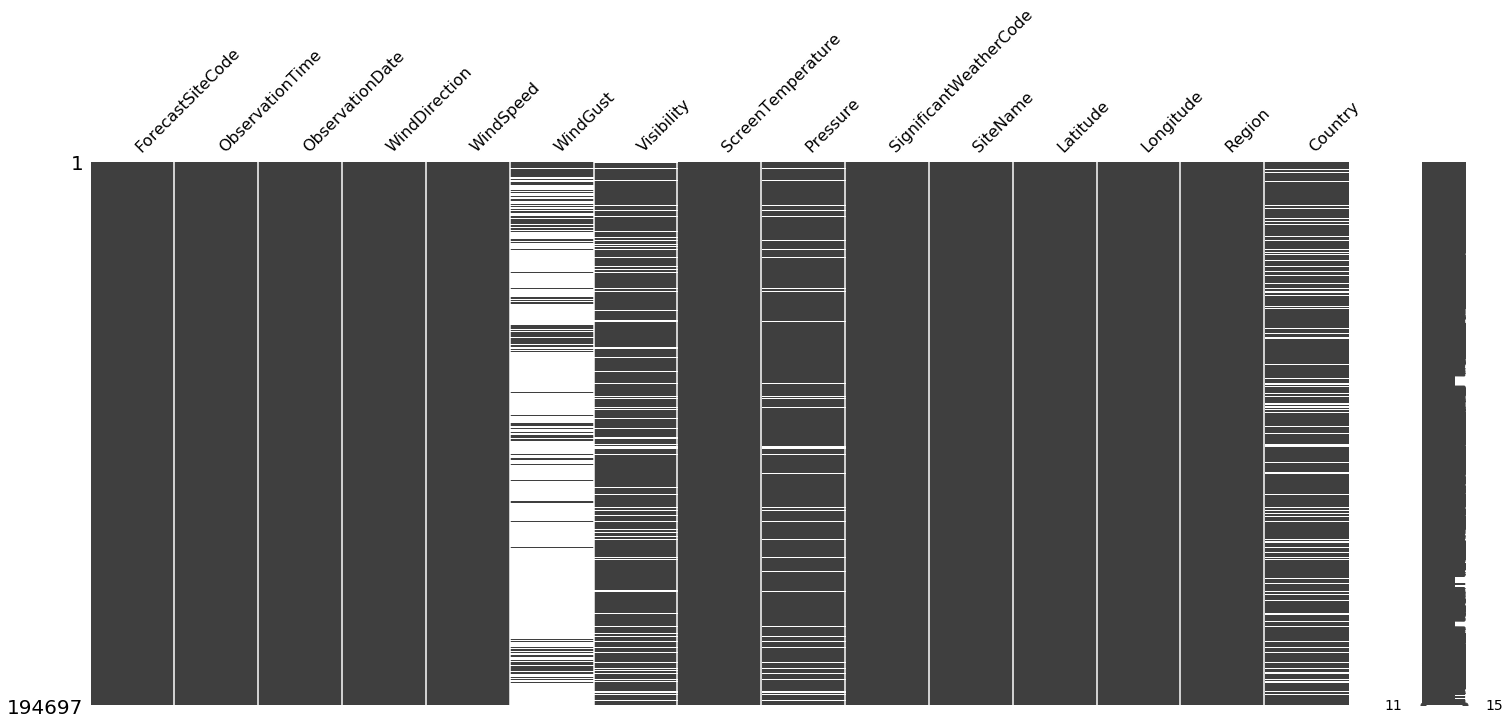

In [45]:
msno.matrix(weather_complete) 

It looks like the critical fields to answer the questions are 100% available

# Convert to parquet

In [20]:
ppd.io.parquet.PyArrowImpl()

In [23]:
weather_complete.to_parquet('weather_parquet.gzip',compression='gzip')

There is capability to add row group to to_parquet when using PyArrow, however

"**Configurations**

_Row group size:_

Larger row groups allow for larger column chunks which makes it possible to do larger sequential IO. Larger groups also require more buffering in the write path (or a two pass write). **We recommend large row groups (512MB - 1GB)**. Since an entire row group might need to be read, we want it to completely fit on one HDFS block. Therefore, HDFS block sizes should also be set to be larger. An optimized read setup would be: 1GB row groups, 1GB HDFS block size, 1 HDFS block per HDFS file.
..."

https://parquet.apache.org/documentation/latest/

The size of the file generated is under 512MB so I believe can exist within a _singular row group_.

# Using Apache Drill to query Parquet

_"Drill runs fastest against Parquet files because Parquet data representation is almost identical to how Drill represents data."_

https://drill.apache.org/docs/choosing-a-storage-format/

Drill is able to performantly query parquet files so I'll make use of this platform. 

# Setting up Apache Drill in Docker

If you're already familiar with Drill then you might want to skip this part :)  

You can setup a test Apache Drill in Docker. 

**docker run -it -v "$PWD":/tmp --name drill-1.17.0 -p 8047:8047 -t apache/drill:1.17.0 /bin/bash**

Note - Drill won't be able to access the files you wish to pass without mouting the directory. 

Update $PWD (present working directory) to wherever you've saved the parquet file. 

Map to the /tmp in the docker container and the file can be accessed in Drill with no additional config as tmp is a location already mapped. 


To access the file in the query use the format (you can treat this like a reference to a table in a relational database) 

- dfs refers to Drill's storage definition for 'local' storage files. 


- `tmp` is a mapped location Drill is already configured for 


- `weather_parquet.gzip` is the file created 

Note the backticks 

# Example Drill Queries 

--------------------------------------

--------------------------------------

--------------------------------------

# Answering the Questions

# Q1. - Which date was the hottest day? 

2016-03-17

In [ ]:
apache drill> WITH weather_mon_day_max AS 
2..semicolon> (select year(ObservationDate) as year, 
3..........)>  month(ObservationDate) as month, 
4..........)>  day(ObservationDate) as day, 
5..........)>  max(ScreenTemperature) as temp
6..........)>  from dfs.`tmp`.`weather_parquet.gzip` 
7..........)>  group by year(ObservationDate),
8..........)>  month(ObservationDate), 
9..........)>  day(ObservationDate) 
10.........)>  order by month(ObservationDate), day(ObservationDate)
11.........)> )
12.semicolon> select * from weather_mon_day_max order by temp desc limit 1
13.semicolon> ;
14..........> 
+------+-------+-----+------+
| year | month | day | temp |
+------+-------+-----+------+
| 2016 | 3     | 17  | 15.8 |
+------+-------+-----+------+
1 row selected (4.685 seconds)

# Q2. What was the temperature that day? 

15.8

(this ties up with the pandas describe above)

# Q3. In which region was the hottest day?

In [ ]:
Highland & Eilean Siar

In [ ]:
apache drill> select Region from dfs.`tmp`.`weather_parquet.gzip` where ScreenTemperature = 15.8;
+------------------------+
|         Region         |
+------------------------+
| Highland & Eilean Siar |
+------------------------+
1 row selected (1.161 seconds)


# Using pydrill

Drill provides an API accessible to Python. Using the API its possible to use the same queries 

In [34]:
drill = PyDrill(host='localhost', port=8047)

if not drill.is_active():
    raise ImproperlyConfigured('Please run Drill first')


print('# Q1/Q2. - Which date was the hottest day? / What was the temperature?')
q1 = drill.query('''
WITH weather_mon_day_max AS 
(select 
    year(ObservationDate) as year, 
    month(ObservationDate) as month, 
    day(ObservationDate) as day, 
    max(ScreenTemperature) as temp
from dfs.`tmp`.`weather_parquet.gzip` 
    group by year(ObservationDate),
    month(ObservationDate), 
    day(ObservationDate) 
    order by month(ObservationDate), day(ObservationDate)
)
select * from weather_mon_day_max order by temp desc limit 1
'''
                )

for result in q1:
    print(result)

print('-------------------------------------------------------------')

print('Q3. In which region was the hottest day?')

q3 = drill.query('''
select Region from dfs.`tmp`.`weather_parquet.gzip` where ScreenTemperature = 15.8
'''
                )

for result in q3:
    print(result)

# Q1/Q2. - Which date was the hottest day? / What was the temperature?
{'temp': '15.8', 'month': '3', 'year': '2016', 'day': '17'}
-------------------------------------------------------------
Q3. In which region was the hottest day?
{'Region': 'Highland & Eilean Siar'}
